In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from feature_extraction import calculate_person_height
from feature_extraction import normalize_image

2024-04-28 14:52:17.334906: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 14:52:17.363631: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 14:52:17.833729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the CSV file
df = pd.read_csv('/home/saiganesh.s/ML/body_measurements/updated_csv_file.csv')
df = df.dropna(subset=['Shoulder', 'pix_height','pix_shoulder_distance','pix_waist_distance','top_pix_distance','pix_upperbody_distance','pix_lowerbody_distance'])


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data from CSV
data = df

# Extract features (X) and target variable (y)
X = data[['top_pix_distance','pix_height','pix_waist_distance']].values  # Centimeter measurements
y = data[['Waist']].values  # Pixel values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
X_train

array([[0.14770833, 0.72985453, 0.13090105],
       [0.13193148, 0.77575746, 0.13888915],
       [0.13620055, 0.67624181, 0.12973552],
       ...,
       [0.13002872, 0.78321065, 0.16496781],
       [0.1096634 , 0.74814233, 0.13075708],
       [0.14574572, 0.6862717 , 0.11403872]])

In [8]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_train_score = linear_model.score(X_train, y_train)
linear_test_score = linear_model.score(X_test, y_test)
print("Linear Regression - Training R^2 score:", linear_train_score)
print("Linear Regression - Testing R^2 score:", linear_test_score)



Linear Regression - Training R^2 score: 0.15923672872362593
Linear Regression - Testing R^2 score: -0.0404508503128973


In [9]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())  # Ravel y to convert it to 1D array
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)
print("Random Forest - Training R^2 score:", rf_train_score)
print("Random Forest - Testing R^2 score:", rf_test_score)

Random Forest - Training R^2 score: 0.866318099879116
Random Forest - Testing R^2 score: 0.03553198681713576


In [10]:
# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_train_score = poly_model.score(X_train, y_train)
poly_test_score = poly_model.score(X_test, y_test)
print("Polynomial Regression - Training R^2 score:", poly_train_score)
print("Polynomial Regression - Testing R^2 score:", poly_test_score)


Polynomial Regression - Training R^2 score: 0.20075738557541656
Polynomial Regression - Testing R^2 score: 0.049008843538126845


In [24]:
# Neural Network
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=X_train.reshape(-1,1).shape),  # 1 input feature (height)
    Dense(32, activation='relu'),
    Dense(1)  # 1 output neuron for predicting pixel values (pix_height)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)
nn_train_loss = nn_model.evaluate(X_train, y_train)
nn_test_loss = nn_model.evaluate(X_test, y_test)
print("Neural Network - Training loss:", nn_train_loss)
print("Neural Network - Testing loss:", nn_test_loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 137.1342
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.2952 
Neural Network - Training loss: 120.18917846679688
Neural Network - Testing loss: 109.5559310913086


### MSE for NN


In [21]:
X_test.shape

(100, 3)

In [13]:
y_test

array([[81.  ],
       [61.  ],
       [81.3 ],
       [71.2 ],
       [81.3 ],
       [61.  ],
       [76.2 ],
       [63.5 ],
       [76.2 ],
       [96.52],
       [86.4 ],
       [76.  ],
       [78.5 ],
       [86.4 ],
       [63.5 ],
       [66.  ],
       [73.5 ],
       [86.36],
       [81.3 ],
       [63.5 ],
       [86.4 ],
       [63.5 ],
       [68.5 ],
       [71.  ],
       [61.  ],
       [78.7 ],
       [71.  ],
       [63.5 ],
       [61.  ],
       [66.  ],
       [91.4 ],
       [86.4 ],
       [61.  ],
       [58.42],
       [66.  ],
       [66.  ],
       [71.2 ],
       [61.  ],
       [68.5 ],
       [81.3 ],
       [84.  ],
       [91.5 ],
       [68.58],
       [61.  ],
       [81.3 ],
       [83.82],
       [68.5 ],
       [86.4 ],
       [84.  ],
       [63.5 ],
       [92.  ],
       [76.  ],
       [66.  ],
       [61.  ],
       [63.5 ],
       [86.5 ],
       [61.  ],
       [83.8 ],
       [76.2 ],
       [66.  ],
       [97.  ],
       [68.58],
       [

In [25]:
# Neural Network
# nn_pred_train = nn_model.predict(X_train)
nn_pred_test = nn_model.predict(X_test)
# nn_train_mse = mean_squared_error(y_train, nn_pred_train)
# nn_test_mse = mean_squared_error(y_test, nn_pred_test)
# print("Neural Network - Training MSE:", nn_train_mse)
# print("Neural Network - Testing MSE:", nn_test_mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [26]:
nn_pred_test

array([[[70.90964 ],
        [73.681526],
        [71.14061 ]],

       [[70.992   ],
        [73.58227 ],
        [71.05975 ]],

       [[71.38716 ],
        [73.17259 ],
        [70.97809 ]],

       [[71.09569 ],
        [73.334305],
        [70.965485]],

       [[70.88832 ],
        [73.70271 ],
        [71.198875]],

       [[70.96452 ],
        [73.58972 ],
        [71.05058 ]],

       [[71.037155],
        [73.53466 ],
        [71.08736 ]],

       [[70.89597 ],
        [73.622604],
        [71.03552 ]],

       [[70.80794 ],
        [73.80415 ],
        [71.05638 ]],

       [[70.95517 ],
        [73.22331 ],
        [71.01643 ]],

       [[71.07826 ],
        [73.37671 ],
        [70.973946]],

       [[71.00842 ],
        [73.535995],
        [71.14588 ]],

       [[71.29242 ],
        [73.100174],
        [70.98832 ]],

       [[70.8925  ],
        [73.98749 ],
        [71.06804 ]],

       [[70.928955],
        [73.64109 ],
        [70.95476 ]],

       [[70.81727 ],
    

In [39]:
# Linear Regression
linear_pred_train = linear_model.predict(X_train)
linear_pred_test = linear_model.predict(X_test)
# linear_train_mse = mean_squared_error(y_train, linear_pred_train)
linear_test_mse = mean_squared_error(y_test, linear_pred_test)
# print("Linear Regression - Training MSE:", linear_train_mse)
print("Linear Regression - Testing MSE:", linear_test_mse)

# Random Forest
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
# rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
# print("Random Forest - Training MSE:", rf_train_mse)
print("Random Forest - Testing MSE:", rf_test_mse)

# Polynomial Regression
poly_pred_train = poly_model.predict(X_train)
poly_pred_test = poly_model.predict(X_test)
# poly_train_mse = mean_squared_error(y_train, poly_pred_train)
poly_test_mse = mean_squared_error(y_test, poly_pred_test)
# print("Polynomial Regression - Training MSE:", poly_train_mse)
print("Polynomial Regression - Testing MSE:", poly_test_mse)

Linear Regression - Testing MSE: 109.57588386287068
Random Forest - Testing MSE: 101.5736927604
Polynomial Regression - Testing MSE: 100.15436719932062


In [28]:
X_test.shape

(100, 3)

In [29]:
y_test.shape

(100, 1)

In [30]:
rf_pred_test

array([85.5248, 71.8004, 76.148 , 73.6322, 74.735 , 70.5192, 75.41  ,
       66.617 , 76.7782, 75.326 , 66.6344, 80.3518, 78.77  , 76.1082,
       64.352 , 70.149 , 78.9614, 70.3566, 82.88  , 66.9922, 64.9284,
       84.8062, 76.547 , 82.804 , 65.481 , 80.0504, 71.3818, 63.76  ,
       70.7524, 63.093 , 83.1936, 71.649 , 65.651 , 82.8198, 64.083 ,
       77.9848, 70.7194, 84.086 , 64.034 , 78.2182, 74.5874, 67.1744,
       71.121 , 71.3726, 65.4526, 65.8996, 69.0558, 74.0542, 69.813 ,
       67.3252, 79.3054, 77.2892, 75.677 , 68.62  , 65.0892, 78.8474,
       70.0794, 78.7024, 60.664 , 72.7004, 83.9514, 66.894 , 71.683 ,
       64.159 , 80.397 , 66.9796, 71.86  , 64.483 , 75.456 , 65.835 ,
       70.1456, 77.795 , 81.5898, 71.554 , 64.422 , 64.604 , 64.531 ,
       71.763 , 73.1388, 85.1654, 75.8984, 65.5806, 65.587 , 74.6022,
       83.0466, 63.958 , 66.977 , 80.1864, 62.015 , 75.8268, 67.232 ,
       76.1192, 71.871 , 63.0602, 66.732 , 83.5312, 67.1776, 76.117 ,
       67.996 , 67.2

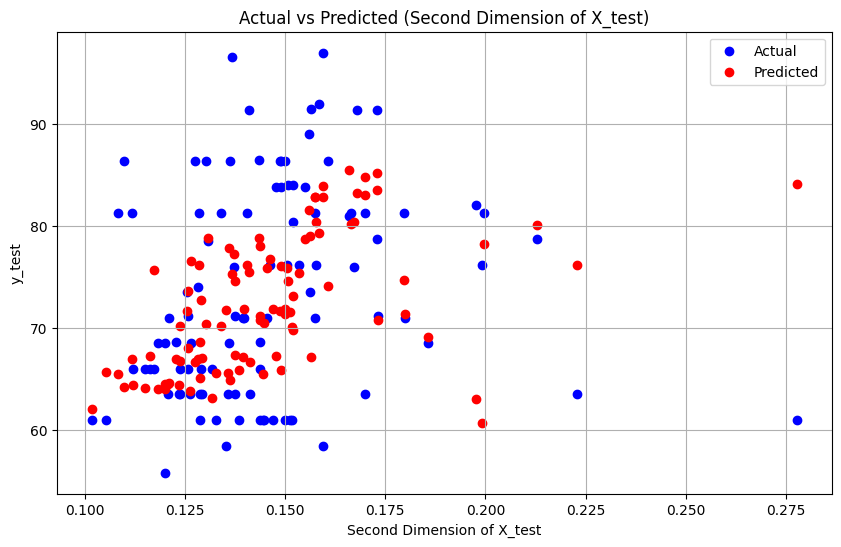

In [31]:
# Plot second dimension of X_test against y_test
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], rf_pred_test, color='red', label='Predicted')
plt.title('Actual vs Predicted (Second Dimension of X_test)')
plt.xlabel('Second Dimension of X_test')
plt.ylabel('y_test')
plt.legend()
plt.grid(True)
plt.show()


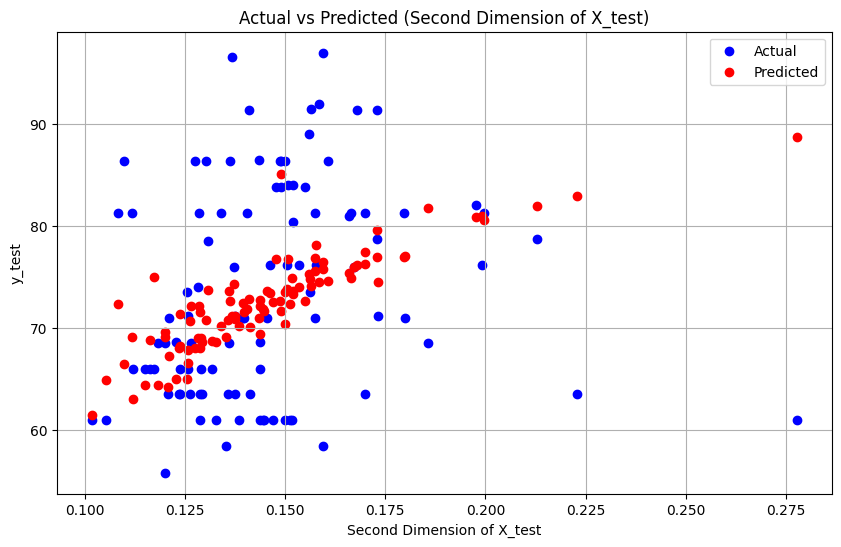

In [32]:
# Plot second dimension of X_test against y_test
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], poly_pred_test, color='red', label='Predicted')
plt.title('Actual vs Predicted (Second Dimension of X_test)')
plt.xlabel('Second Dimension of X_test')
plt.ylabel('y_test')
plt.legend()
plt.grid(True)
plt.show()


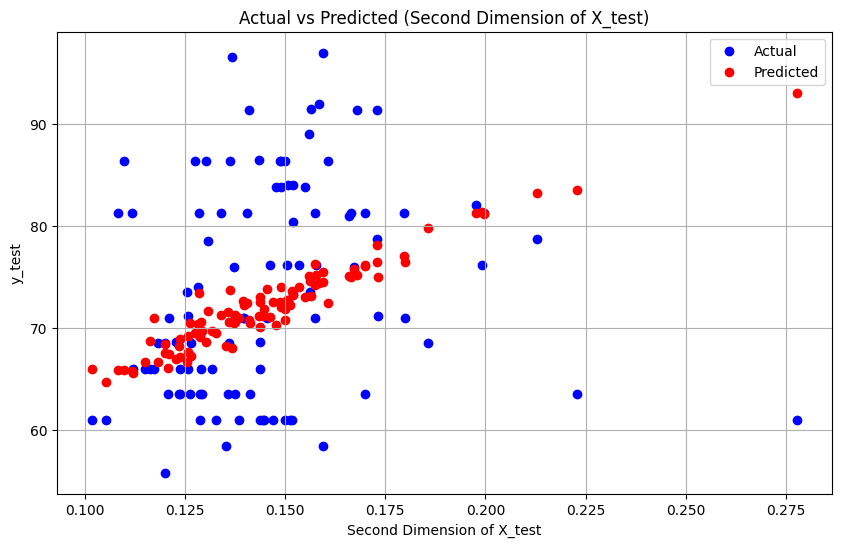

In [33]:
# Plot second dimension of X_test against y_test
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 2], linear_pred_test, color='red', label='Predicted')
plt.title('Actual vs Predicted (Second Dimension of X_test)')
plt.xlabel('Second Dimension of X_test')
plt.ylabel('y_test')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# df['Height & Weight'] = df['Height & Weight'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             496 non-null    int64  
 1   Filename               496 non-null    object 
 2   Height                 496 non-null    float64
 3   Waist                  496 non-null    float64
 4   Chest                  496 non-null    float64
 5   Shoulder               496 non-null    float64
 6   pix_height             496 non-null    float64
 7   pix_shoulder_distance  496 non-null    float64
 8   pix_waist_distance     496 non-null    float64
 9   top_pix_distance       496 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 42.6+ KB


# TESTING 

In [34]:
import cv2
import mediapipe as mp

In [38]:
pixel_height_to_predict = calculate_person_height('/home/saiganesh.s/ML/body_measurements/Dataset/012-cameron-diaz.jpg')
# pixel_height_to_predict = calculate_person_height('/home/saiganesh.s/ML/body_measurements/crishemsworth.jpg')
print("POLY MODEL Pixel Height" ,pixel_height_to_predict[1])
waist=pixel_height_to_predict[2]
height=pixel_height_to_predict[0]
top_pixel=pixel_height_to_predict[3]
prediction=poly_model.predict([[top_pixel,height,waist]])
# predicted_height_cm=prediction[0][0]

print(prediction)

POLY MODEL Pixel Height 0.26282426910322126
[[72.24074072]]


I0000 00:00:1714296474.069790  208779 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714296474.070674  253340 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) Graphics (RPL-P)
/home/saiganesh.s/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
